In [21]:
import numpy as np
import math
from matplotlib import pylab as plt
import pandas as pd
from root_pandas import read_root, to_root
import uproot
# import time
# from mpl_toolkits.mplot3d import Axes3D # <--- This is important for 3d plotting 
from scipy import stats

filename="../Inaki/ElectronPS/ElectronPSx200*.root"    
ur=uproot.pandas.iterate(filename, "PhaseSpace", ['X','Y','dX','dY','Ekine','Weight'])

mylist=list(ur)        
dftot=pd.concat(mylist, ignore_index=True, sort=False  ,copy = False)
dftot

,X,Y,dX,dY,Ekine,Weight
0,-11.024525,8.793971,-0.252519,-0.008170,2.061133,5.000000e-03
1,-27.460190,1.618533,-0.061740,-0.142089,0.839009,5.000000e-03
2,22.368677,-29.064337,0.521212,-0.252769,1.809978,5.000000e-03
3,-15.373204,-0.878929,-0.291016,-0.105804,2.071057,5.000000e-03
4,-25.163414,-1.659726,-0.424559,-0.051804,1.416860,5.000000e-03
...,...,...,...,...,...,...
25550624,-28.368746,-1.848347,-0.348816,-0.017627,0.591362,1.250000e-07
25550625,21.094408,-1.483732,0.351193,-0.128811,0.665266,5.000000e-03
25550626,-21.577242,26.125523,-0.298600,0.240938,0.697922,2.500000e-05
25550627,-2.763934,-10.955666,0.069246,-0.260808,0.644968,2.500000e-05


In [2]:
dftotsub=dftot #[['X','Y','Ekine']]

nparr=dftotsub.to_numpy()
values=nparr.T

values.shape
# fig, ax = plt.subplots()

# ax.scatter(dftotsub['X'],dftotsub['Y'], c=dftotsub['Ekine'])
# plt.show()

(6, 25550629)

In [3]:
# plt.hist2d(dftotsub['X'],dftotsub['Y'],bins=(40,40))
# plt.colorbar()
# plt.show()

In [4]:
kde = stats.gaussian_kde(values)
kde

In [5]:
# density = kde(values)



In [6]:
# from mpl_toolkits.mplot3d import Axes3D # <--- This is important for 3d plotting 

# fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
# x, y, z = values
# ax.scatter(x, y, z, c=density)
# plt.show()

In [36]:
newsample = stats.gaussian_kde.resample(kde,10000000)
newsample.shape

(6, 10000000)

In [37]:
newsampleT=newsample.T


In [39]:
newdf=pd.DataFrame(newsampleT,columns=['X','Y','dX','dY','Ekine','Weight'])

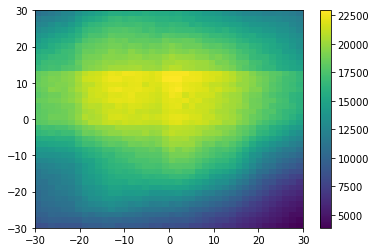

In [13]:
plt.hist2d(dftotsub['X'],dftotsub['Y'],bins=(40,40))
plt.colorbar()
plt.show()

In [14]:
newdf.to_root('newDataForElectrons.root', key='PhaseSpace')

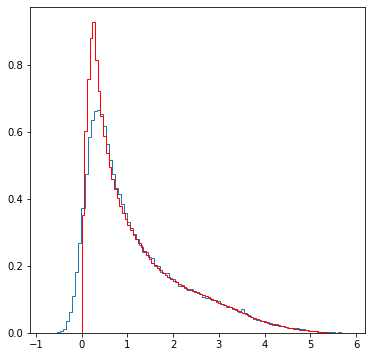

In [22]:
plt.figure(figsize=(6,6))
_=plt.hist(newdf['Ekine'],bins=100,histtype='step',density=True)
_=plt.hist(dftotsub['Ekine'],bins=100,histtype='step',color='red',density=True)

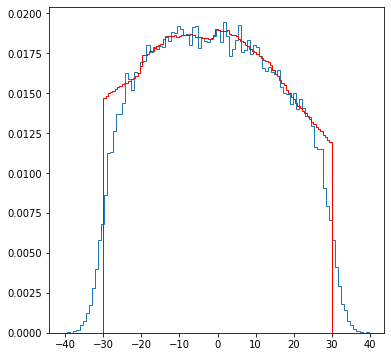

In [23]:
plt.figure(figsize=(6,6))
_=plt.hist(newdf['X'],bins=100,histtype='step',density=True)
_=plt.hist(dftotsub['X'],bins=100,histtype='step',color='red',density=True)

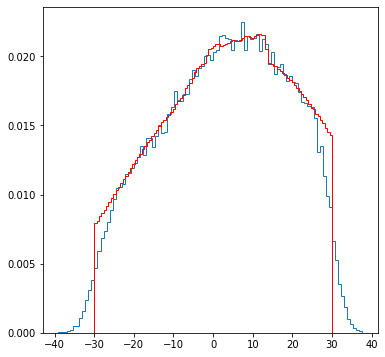

In [24]:
plt.figure(figsize=(6,6))
_=plt.hist(newdf['Y'],bins=100,histtype='step',density=True)
_=plt.hist(dftotsub['Y'],bins=100,histtype='step',color='red',density=True)

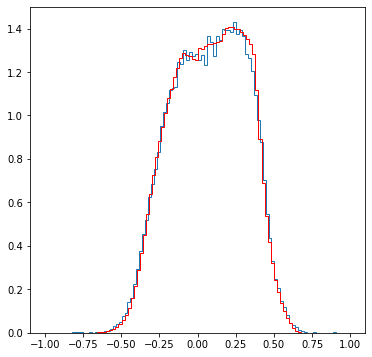

In [25]:
plt.figure(figsize=(6,6))
_=plt.hist(newdf['dX'],bins=100,histtype='step',density=True)
_=plt.hist(dftotsub['dX'],bins=100,histtype='step',color='red',density=True)

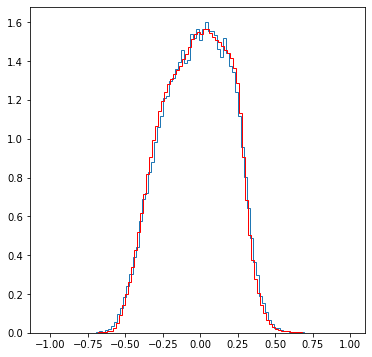

In [26]:
plt.figure(figsize=(6,6))
_=plt.hist(newdf['dY'],bins=100,histtype='step',density=True)
_=plt.hist(dftotsub['dY'],bins=100,histtype='step',color='red',density=True)

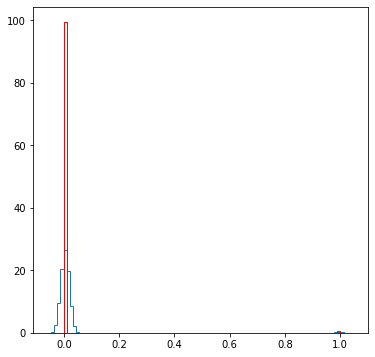

In [27]:
plt.figure(figsize=(6,6))
_=plt.hist(newdf['Weight'],bins=100,histtype='step',density=True)
_=plt.hist(dftotsub['Weight'],bins=100,histtype='step',color='red',density=True)

In [ ]:
kde = stats.gaussian_kde(values,bw_method='silverman')
kde

In [ ]:
newsample2 = stats.gaussian_kde.resample(kde,10000000)
newsample2.shape

In [ ]:
newdfsilverman=pd.DataFrame(newsample2.T,columns=['X','Y','dX','dY','Ekine','Weight'])

In [ ]:
plt.figure(figsize=(6,6))
_=plt.hist(newdfsilverman['Ekine'],bins=100,histtype='step',density=True)
_=plt.hist(dftotsub['Ekine'],bins=100,histtype='step',color='red',density=True)

In [ ]:
newdfsub=newdf[(newdf['Weight']>0)&(newdf['Ekine']>0)&(abs(newdf['X'])<30)&(abs(newdf['Y'])<30)]


In [ ]:
plt.figure(figsize=(6,6))
_=plt.hist(newdfsub['Y'],bins=100,histtype='step',density=True)
_=plt.hist(dftotsub['Y'],bins=100,histtype='step',color='red',density=True)

In [ ]:
newdfsub.to_root('newDataForElectrons.root', key='PhaseSpace')

In [ ]:
newdfsub['dZ']=pow(1.0-newdfsub['dX']*newdfsub['dX']-newdfsub['dY']*newdfsub['dY'],0.5)


In [ ]:
newdfsub["Z"]=-0.0000005

In [ ]:
newdfsub=newdfsub.astype('float32')

In [ ]:
newdfsub.dtypes

In [ ]:
newdfsubarr=newdfsub.to_numpy()

In [ ]:
newdfsubarr.shape


In [ ]:
newdfsub

In [ ]:
from root_numpy import array2tree


In [ ]:

# arr=np.array(newdfsubarr,dtype=[('X', np.float32),('Y', np.float32),('dX', np.float32),('dY', np.float32),('Ekine', np.float32),('Weight', np.float32),('dZ', np.float32),('Z', np.float32)])
arr=newdfsub


In [ ]:
from ROOT import TFile,TTree,TObject

rfile=TFile("newtree.root","RECREATE")


In [ ]:
rfile.cd()
newdfsubarrtree=array2tree(arr)

In [ ]:
newdfsubarrtree.Write("PhaseSpace",TObject.kOverwrite )

In [ ]:
newdfsubarrtree.Draw("Ekine")

In [ ]:
rfile.Close()

In [ ]:
a

In [ ]:
a = np.array([(1, 2.5, 3.4),(4, 5, 6.8)],dtype=[('a', np.int32),('b', np.float32),('c', np.float64)])
tree = array2tree(a)


In [ ]:
tree

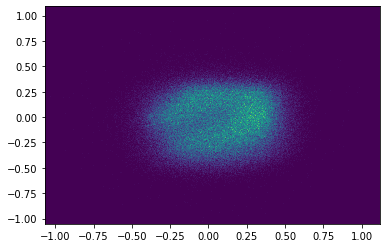

In [46]:
_=plt.hist2d(newdf['dX'],newdf['dY'],bins=(2000,2000))


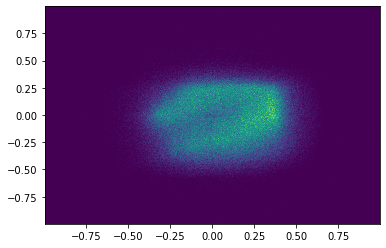

In [45]:
_=plt.hist2d(dftotsub['dX'],dftotsub['dY'],bins=(2000,2000))
